In [1]:
library(ggplot2)
library(dplyr)
library(ggmap)
library(maps)
library(mapdata)
library(lubridate)
options(jupyter.plot_mimetypes = 'image/png')


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Google Maps API Terms of Service: http://developers.google.com/maps/terms.
Please cite ggmap if you use it: see citation("ggmap") for details.

Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



In [2]:
path <- "./google_transit"
data_path <- "./d3js-test/"
extension <- ".txt"

In [3]:
stopEdge_shapePts <- read.csv(file=file.path(path, paste("stopEdge_shapePts", extension, sep="")), header=T)
shape_stopEdge <- read.csv(file=file.path(path, paste("shape_stopEdge", extension, sep="")), header=T)
shapes <- read.csv(file=file.path(path, paste("shapes", extension, sep="")), header=T)
trip_idTOshape_id <- read.csv(file=file.path(path, paste("trip_idTOshape_id", extension, sep="")), header=T)
stop_times <- read.csv(file=file.path(path, paste("stop_times", extension, sep="")), header=T)
stops <- read.csv(file=file.path(path, paste("stops", extension, sep="")), header=T)
stop_edge_table <- read.csv(file=file.path(data_path, paste("stop_edge_table", extension, sep="")), header=T)

## Static Data Relations
![title](SDMTS-Part-1/Static_Info_Relation.png)

## Live Data Feed
[Click here](https://realtime.sdmts.com/api/api/gtfs_realtime/vehicle-positions-for-agency/MTS.pbtext?key=65855fcd-32a6-4ddc-8b70-ab58f6806e21)

![title](images/SDMTS_Data_Pipeline.png)

In [4]:
shape_id_test =  '202_8_22'
shape_stop_edge_test <- shape_stopEdge[shape_stopEdge$shape_id ==  shape_id_test,]
stop_edge_list_test <- shape_stop_edge_test$stop_edge_id

trip_id_test <- trip_idTOshape_id[trip_idTOshape_id$shape_id == shape_id_test,]$trip_id[[1]]
stops_list_test <- stop_times[stop_times$trip_id == trip_id_test,]
stops_test <- merge(stops_list_test, stops)

In [5]:
stopEdge_shapePts_test <- filter(stopEdge_shapePts, stop_edge_id %in% stop_edge_list_test)

In [6]:
size_bbox <- 0.25
bbox <- make_bbox(lon = stopEdge_shapePts_test$shape_pt_lon, lat = stopEdge_shapePts_test$shape_pt_lat, f = size_bbox)
sq_map <- get_map(location = bbox, maptype = "roadmap", source = "google")

Warning message:
“bounding box given to google - spatial extent only approximate.”converting bounding box to center/zoom specification. (experimental)
Source : https://maps.googleapis.com/maps/api/staticmap?center=32.87185,-117.2265&zoom=15&size=640x640&scale=2&maptype=roadmap&language=en-EN


In [7]:
stop_edge_test_path_plot <- geom_path(data = stopEdge_shapePts_test,
                                      mapping = aes(x = shape_pt_lon, y = shape_pt_lat, colour=stop_edge_id), 
                                      alpha = 0.9, size = 2, show.legend = F)

stops_test_plot = geom_point(data = stops_test,
                             mapping = aes(x = stop_lon, y = stop_lat), 
                             color="black", alpha = 0.5, size = 5, show.legend = F)

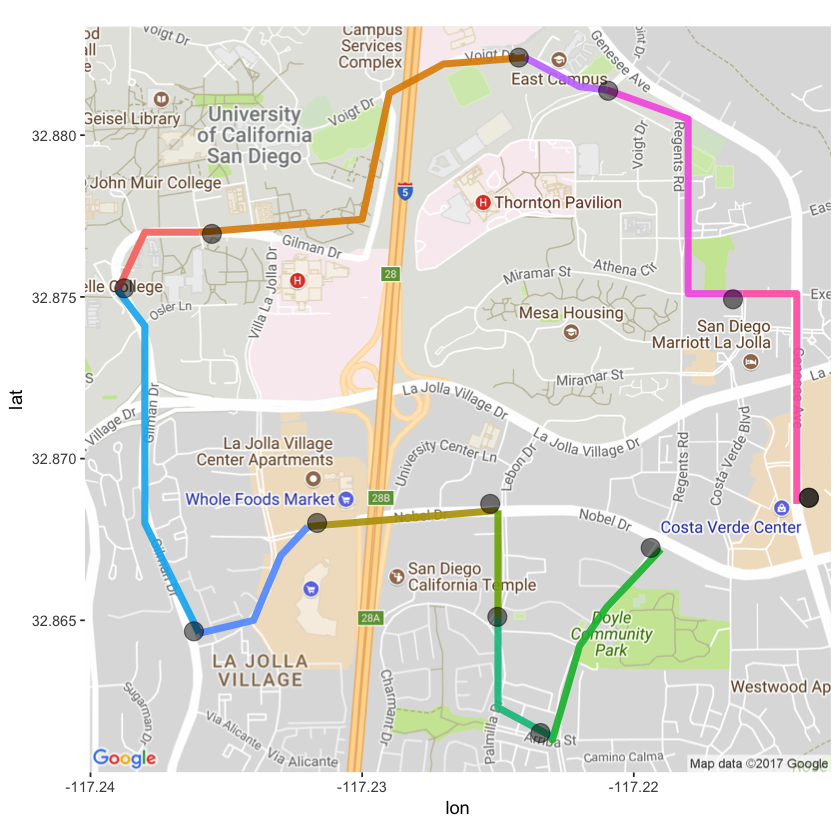

In [8]:
ggmap(sq_map) + stop_edge_test_path_plot + stops_test_plot

In [9]:
shapes_plot <- geom_path(data = shapes,
                           mapping = aes(x = shape_pt_lon, y = shape_pt_lat, colour=shape_id), 
                           alpha = 0.2, size = 2, show.legend = F)
stops_plot <- geom_point(data = stops,
                             mapping = aes(x = stop_lon, y = stop_lat), 
                             color="black", alpha = 0.5, size = 5, show.legend = F)
stop_edge_path_plot <- geom_path(data = stopEdge_shapePts,
                                      mapping = aes(x = shape_pt_lon, y = shape_pt_lat, colour=stop_edge_id), 
                                      alpha = 0.9, size = 2, show.legend = F)

In [1]:
ggmap(sq_map) + shapes_plot + stops_plot + stop_edge_path_plot

ERROR: Error in eval(expr, envir, enclos): could not find function "ggmap"


In [11]:
shapes_test <- shapes[shapes$shape_id == shape_id_test,]
shapes_test_plot <- geom_point(data = shapes_test,
                           mapping = aes(x = shape_pt_lon, y = shape_pt_lat, colour=shape_id), 
                           alpha = 0.9, size = 2, show.legend = F)

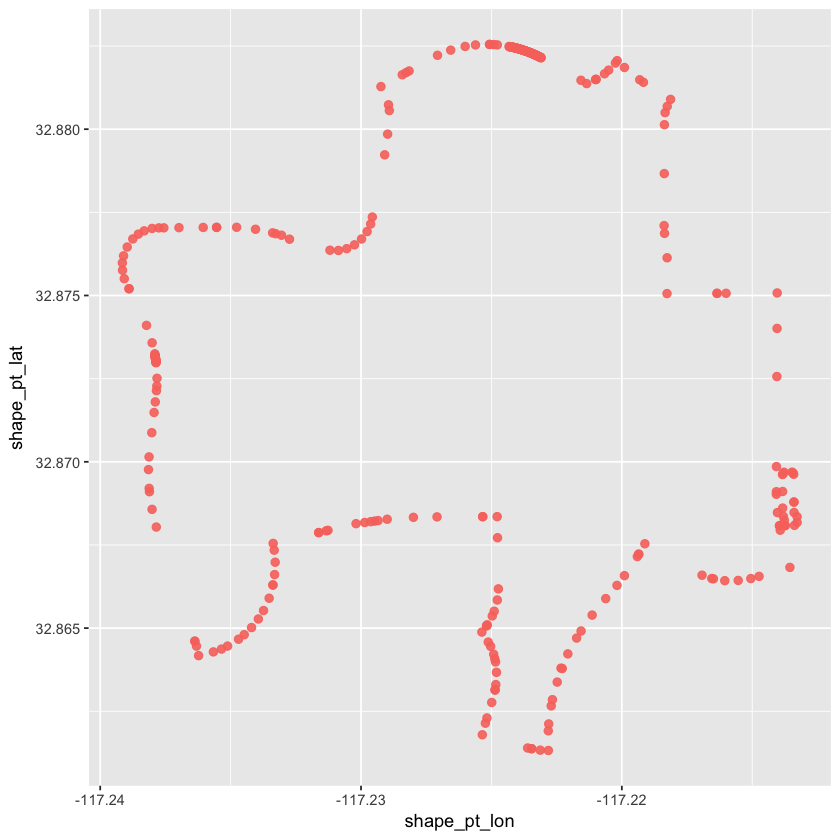

In [12]:
ggplot() + shapes_test_plot

In [13]:
stop_edge_test_path_points_plot <- geom_point(data = stopEdge_shapePts_test,
                                              mapping = aes(x = shape_pt_lon, y = shape_pt_lat, colour=stop_edge_id), 
                                              alpha = 0.9, size = 5, show.legend = F)

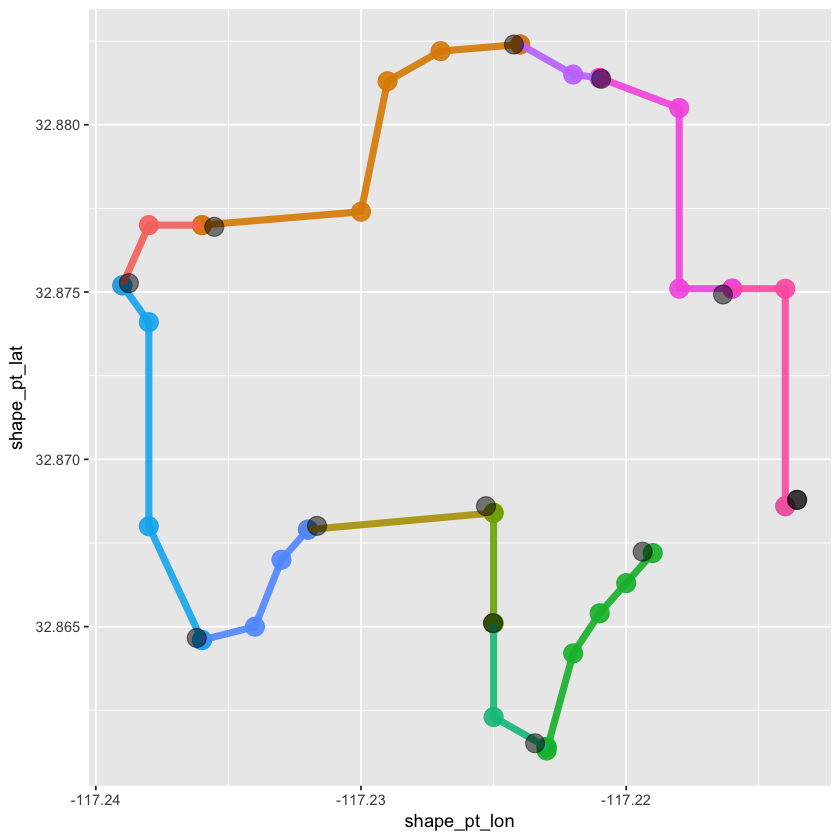

In [14]:
ggplot() + stop_edge_test_path_points_plot + stop_edge_test_path_plot + stops_test_plot

In [15]:
stop_edge_table <- stop_edge_table[(complete.cases(stop_edge_table)),]

In [16]:
stop_edge_listed <- unique(stop_edge_table$stop_edge_id)

In [17]:
stopEdge_shapePts_listed <- filter(stopEdge_shapePts, stop_edge_id %in% stop_edge_listed)

In [18]:
size_big_bbox <- 0.25
big_bbox <- make_bbox(lon = stopEdge_shapePts_listed$shape_pt_lon, lat = stopEdge_shapePts_listed$shape_pt_lat, f = size_big_bbox)
big_sq_map <- get_map(location = big_bbox, maptype = "roadmap", source = "google")

Warning message:
“bounding box given to google - spatial extent only approximate.”converting bounding box to center/zoom specification. (experimental)
Source : https://maps.googleapis.com/maps/api/staticmap?center=32.8337,-116.9915&zoom=10&size=640x640&scale=2&maptype=roadmap&language=en-EN


In [19]:
stopEdge_shapePts_listed_plot <- geom_path(data = stopEdge_shapePts_listed,
                                            mapping = aes(x = shape_pt_lon, y = shape_pt_lat, colour=stop_edge_id), 
                                            alpha = 0.5, size = 1, show.legend = F)

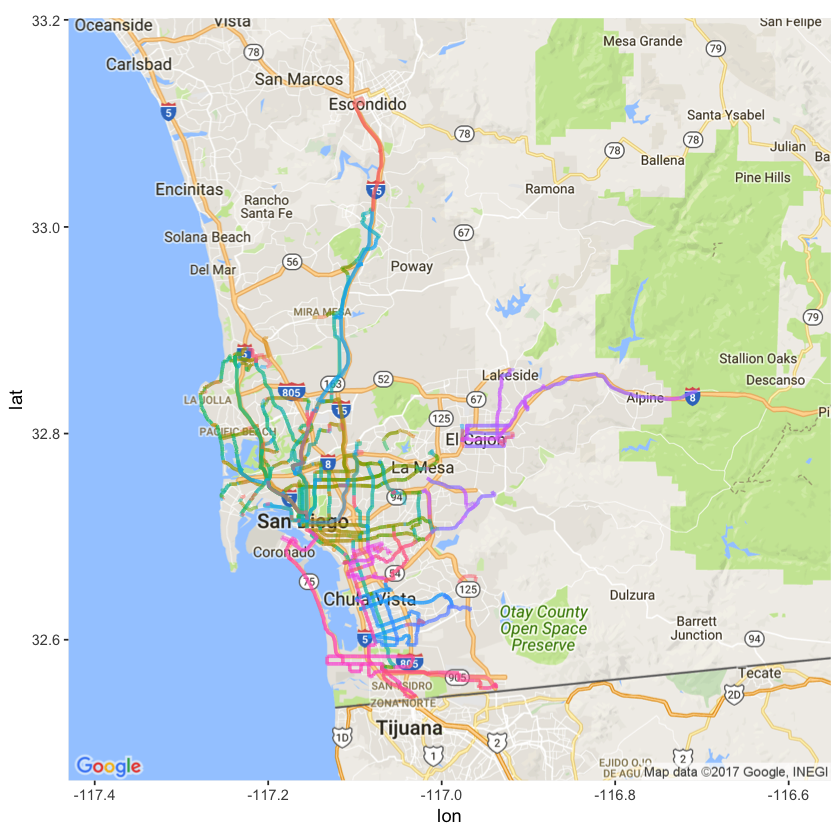

In [20]:
ggmap(big_sq_map) + stopEdge_shapePts_listed_plot

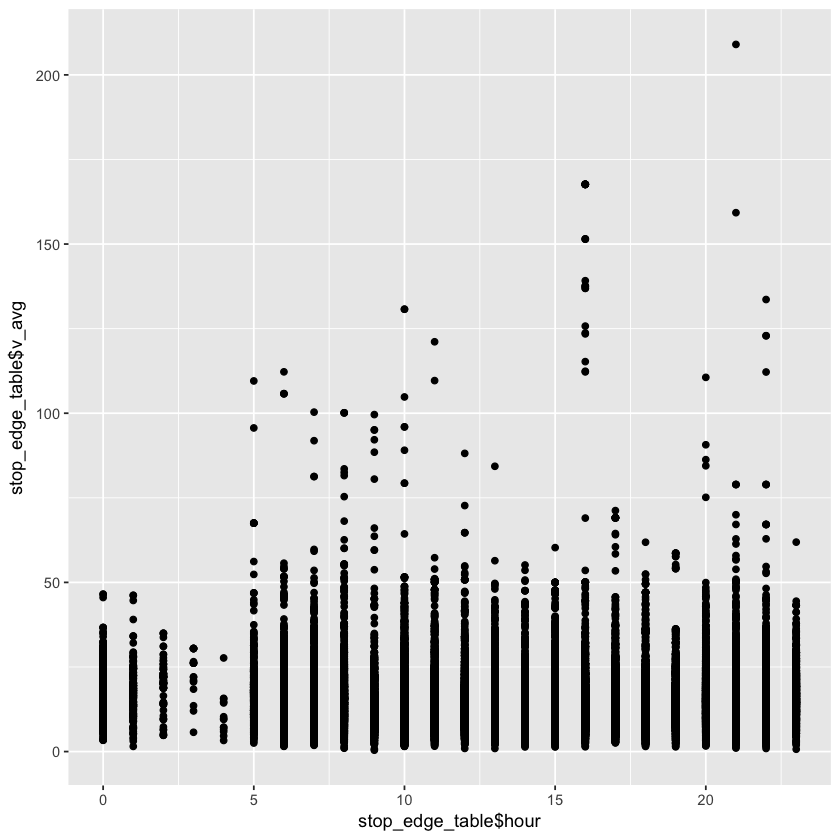

In [21]:
qplot(stop_edge_table$hour, stop_edge_table$v_avg)

In [22]:
stop_edge_max_entry <- stop_edge_table[stop_edge_table$v_avg == max(stop_edge_table$v_avg),]

In [23]:
stop_edge_max_entry

,stop_edge_id,hour,dow,v_avg
472054,10159_10180,21,5,209.0021


In [28]:
by_hour_aggregate <- aggregate(stop_edge_table$v_avg, by = list(time = stop_edge_table$hour), 
                               FUN=mean, na.rm=TRUE)
by_hour_aggregate$v_avg <- by_hour_aggregate$x

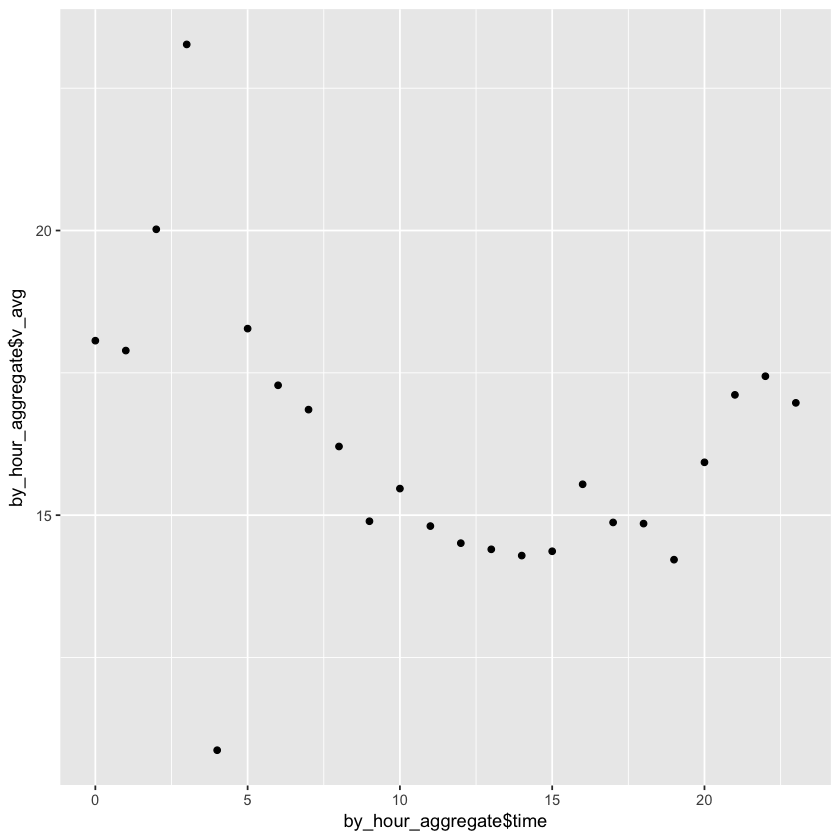

In [29]:
qplot(by_hour_aggregate$time, by_hour_aggregate$v_avg)